In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import anndata
import scanpy as sc

import pandas as pd
import numpy as np

In [3]:
%load_ext autoreload
%autoreload 2

In [ ]:
plt.rcParams.update({'axes.titlesize': 18})
plt.rc_context({"legend.fontsize": 16})

In [5]:
#adata = anndata.read_h5ad("../data/cellcycle_maxine/RPE_37C_Rep1_full.h5ad")
DATA_FOLDER = "../../data/"
adata = anndata.read_h5ad(f"{DATA_FOLDER}cellcycle_maxine/VASA_preprocesseed.h5ad")

In [6]:
layer_to_use = "spliced"
library_size = adata.layers[layer_to_use].sum(axis=1).A1

In [10]:
SMALL_CYCLING_GENE_SET = np.array(['Anln', 'Anp32e', 'Atad2', 'Aurka', 'Aurkb', 'Birc5', 'Blm',
       'Brip1', 'Bub1', 'Casp8ap2', 'Cbx5', 'Ccnb2', 'Ccne2', 'Cdc20',
       'Cdc25c', 'Cdc45', 'Cdc6', 'Cdca2', 'Cdca3', 'Cdca7', 'Cdca8',
       'Cdk1', 'Cenpa', 'Cenpe', 'Cenpf', 'Cenpu', 'Chaf1b', 'Ckap2',
       'Ckap2l', 'Ckap5', 'Cks1b', 'Cks2', 'Clspn', 'Ctcf', 'Dlgap5',
       'Dscc1', 'Dtl', 'E2f8', 'Ect2', 'Esco2', 'Exo1', 'Fen1', 'G2e3',
       'Gas2l3', 'Gins2', 'Gmnn', 'Gtse1', 'Hells', 'Hjurp', 'Hmgb2',
       'Hmmr', 'Jpt1', 'Kif11', 'Kif20b', 'Kif23', 'Kif2c', 'Lbr', 'Mcm2',
       'Mcm4', 'Mcm5', 'Mcm6', 'Mki67', 'Msh2', 'Nasp', 'Ncapd2', 'Ndc80',
       'Nek2', 'Nuf2', 'Nusap1', 'Pcna', 'Pimreg', 'Pola1', 'Pold3',
       'Prim1', 'Psrc1', 'Rad51', 'Rad51ap1', 'Rangap1', 'Rfc2', 'Rpa2',
       'Rrm1', 'Rrm2', 'Slbp', 'Smc4', 'Tacc3', 'Tipin', 'Tmpo', 'Top2a',
       'Tpx2', 'Ttk', 'Tubb4b', 'Tyms', 'Ube2c', 'Ubr7', 'Uhrf1', 'Ung',
       'Usp1', 'Wdr76'])
#upper gene names
#SMALL_CYCLING_GENE_SET = [x.upper() for x in SMALL_CYCLING_GENE_SET]

In [13]:
import sys
sys.path.append("../../../Cyclum/")
import cyclum.tuning
import cyclum.models
from cyclum import writer

2024-12-28 18:04:03.824708: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-28 18:04:03.877269: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-28 18:04:03.890824: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-28 18:04:03.976158: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-28 18:04:04.871957: W tensorflow/compiler/tf2

In [14]:
import pandas as pd
import numpy as np
import sklearn as skl
import pickle

In [15]:
sc.pp.filter_genes(adata, min_cells=100)

In [16]:
adata.shape

(38913, 14589)

In [17]:
sttpm = pd.DataFrame(data=skl.preprocessing.scale(np.log2(adata.layers["spliced"].todense().A + 1)), index=adata.obs_names, columns=adata.var_names)

/home/maxine/miniconda3/envs/cellTypistEnv/lib/python3.12/site-packages/sklearn/preprocessing/_data.py:261: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/maxine/miniconda3/envs/cellTypistEnv/lib/python3.12/site-packages/sklearn/preprocessing/_data.py:280: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


In [18]:
model = cyclum.tuning.CyclumAutoTune(sttpm, max_linear_dims=5, 
                                     epochs=500, rate=2e-4, verbose=100,
                                     encoder_width=[30, 20])

Auto tuning number of linear components...
Performing PCA...


Training Autoencoder with...
    2 linear dimensions...


I0000 00:00:1735405496.150484  416161 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-12-28 18:04:56.157296: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2024-12-28 18:04:56.673313: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2270807028 exceeds 10% of free system memory.
2024-12-28 18:04:58.772361: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2270807028 exceeds 10% of free system memory.


epoch: 100/500, loss:  0.8118, time elapsed:  401.81s, time left:  1607.22s
epoch: 200/500, loss:  0.8118, time elapsed:  803.13s, time left:  1204.70s
epoch: 300/500, loss:  0.8117, time elapsed:  1203.62s, time left:  802.41s
epoch: 400/500, loss:  0.8118, time elapsed:  1604.20s, time left:  401.05s
epoch: 500/500, loss:  0.8117, time elapsed:  2004.35s, time left:  0.00s
[0.8117302060127258]
[0.84075, 0.82398623, 0.809822, 0.79912716, 0.7922462, 0.7866112, 0.7819139]
Found! Use 1 linear components...
Early stop disabled, continue to check all cases...


In [19]:
model

In [20]:
model.train(sttpm, epochs=800, verbose=100, rate=2e-4)

2024-12-28 18:38:25.785275: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2270807028 exceeds 10% of free system memory.
2024-12-28 18:38:27.880512: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2270807028 exceeds 10% of free system memory.


epoch: 100/800, loss:  0.8254, time elapsed:  384.93s, time left:  2694.53s
epoch: 200/800, loss:  0.8252, time elapsed:  767.83s, time left:  2303.50s
epoch: 300/800, loss:  0.8253, time elapsed:  1151.15s, time left:  1918.58s
epoch: 400/800, loss:  0.8253, time elapsed:  1533.80s, time left:  1533.80s
epoch: 500/800, loss:  0.8253, time elapsed:  1916.78s, time left:  1150.07s
epoch: 600/800, loss:  0.8251, time elapsed:  2299.50s, time left:  766.50s
epoch: 700/800, loss:  0.8251, time elapsed:  2681.71s, time left:  383.10s
epoch: 800/800, loss:  0.8253, time elapsed:  3065.61s, time left:  0.00s


In [21]:
from tensorflow.keras.models import Model

In [22]:
intermediate_layer_model = Model(inputs=model.model.input, outputs=model.model.get_layer('encoder_out').output)

# Now you can use this intermediate model
output = intermediate_layer_model.predict(sttpm)

 295/1217 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step

2024-12-28 19:29:36.046138: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2270807028 exceeds 10% of free system memory.


1217/1217 ━━━━━━━━━━━━━━━━━━━━ 1s 466us/step


In [23]:
output

array([[-2.3464696 ],
       [-1.005209  ],
       [-1.549743  ],
       ...,
       [-1.3096218 ],
       [-1.4608586 ],
       [-0.34607825]], dtype=float32)

In [24]:
np.save('/home/maxine/Documents/paychere/cell_cycle_VAE_Fourrier_model/data/cyclum/res.npy', output)

In [8]:
output = np.load('/home/maxine/Documents/paychere/cell_cycle_VAE_Fourrier_model/data/cyclum/res.npy')

In [26]:
sttpm

Gene_Symbol,Gnai3,Cdc45,Scml2,Narf,Cav2,Klf6,Scmh1,Cox5a,Tbx2,Tbx4,...,Gm50139,Gm50387,Gm50367,Gm29695,Tmem179b,Gpr52,AC163616.1,1700094D03Rik,Shld3,AC154607.1
0,0.280082,1.444944,-0.279550,-0.657314,-0.110096,-0.650015,-0.591756,-1.010324,-0.204003,-0.186164,...,-0.121016,-0.501370,-0.066958,-0.338158,-0.330601,-0.110172,-0.268181,-0.200896,-0.287711,-0.118507
1,0.582747,-0.786631,-0.279550,-0.657314,-0.110096,0.523256,1.123470,-1.010324,-0.204003,-0.186164,...,-0.121016,-0.501370,-0.066958,-0.338158,-0.330601,-0.110172,-0.268181,-0.200896,-0.287711,-0.118507
2,-0.660081,0.621336,-0.279550,-0.657314,-0.110096,0.523256,2.838697,-1.010324,-0.204003,-0.186164,...,-0.121016,-0.501370,-0.066958,-0.338158,-0.330601,-0.110172,-0.268181,-0.200896,-0.287711,-0.118507
3,1.039127,-0.786631,-0.279550,0.900689,-0.110096,3.069165,1.123470,2.722453,-0.204003,-0.186164,...,-0.121016,1.577394,-0.066958,-0.338158,-0.330601,-0.110172,-0.268181,4.712865,-0.287711,-0.118507
4,-0.660081,0.621336,-0.279550,-0.657314,-0.110096,0.523256,1.123470,1.344796,-0.204003,-0.186164,...,-0.121016,-0.501370,-0.066958,2.073079,-0.330601,-0.110172,-0.268181,-0.200896,-0.287711,-0.118507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46117,1.039127,0.621336,-0.279550,-0.657314,-0.110096,-0.650015,1.123470,0.856064,-0.204003,-0.186164,...,-0.121016,1.577394,-0.066958,-0.338158,-0.330601,-0.110172,-0.268181,-0.200896,-0.287711,-0.118507
46118,0.582747,-0.786631,-0.279550,-0.657314,-0.110096,-0.650015,-0.591756,-1.010324,-0.204003,-0.186164,...,-0.121016,1.577394,-0.066958,-0.338158,-0.330601,-0.110172,-0.268181,-0.200896,-0.287711,-0.118507
46120,0.280082,-0.786631,-0.279550,-0.657314,-0.110096,-0.650015,-0.591756,-1.010324,-0.204003,-0.186164,...,-0.121016,-0.501370,-0.066958,-0.338158,-0.330601,-0.110172,-0.268181,-0.200896,-0.287711,-0.118507
46121,-0.110121,0.621336,-0.279550,-0.657314,-0.110096,-0.650015,-0.591756,-1.010324,-0.204003,-0.186164,...,-0.121016,1.577394,-0.066958,-0.338158,-0.330601,-0.110172,-0.268181,-0.200896,-0.287711,-0.118507


In [27]:
output.flatten()

array([-2.3464696 , -1.005209  , -1.549743  , ..., -1.3096218 ,
       -1.4608586 , -0.34607825], dtype=float32)

In [40]:
plt.rcParams.update({'axes.titlesize': 18})
plt.rcParams.update({"legend.fontsize": 16})

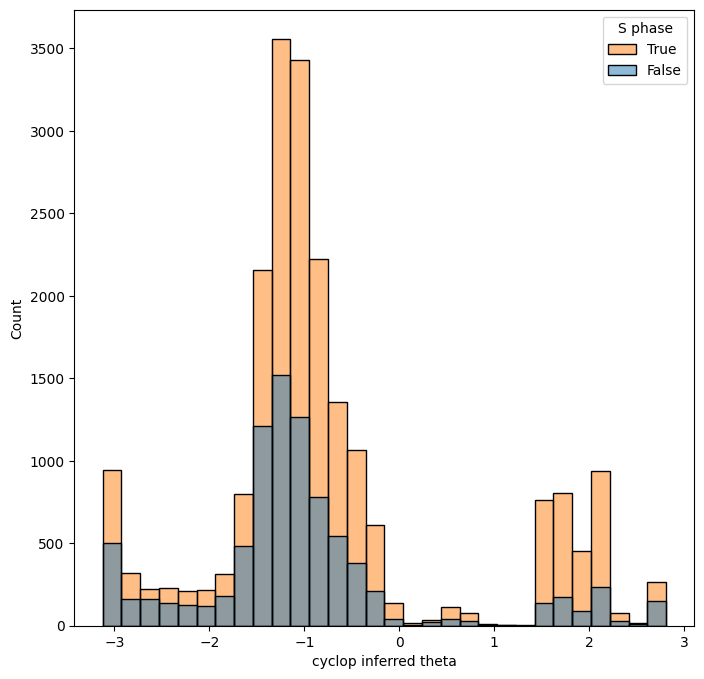

In [11]:
plt.subplots(figsize=(8,8))
sns.histplot(x=output.flatten(),hue=adata.obs["S-phase"].values,legend=False,bins=30).set(xlabel="cyclop inferred theta")
plt.legend(title='S phase',labels=['True', 'False'])

In [42]:
from scipy.spatial.distance import jensenshannon
def get_jensenshannon(pseudotimes, hue_values, n_bins=50):
    """
    Compute the Jensen-Shannon divergence between two categories of cells
    based on their pseudotime_column distribution.

    Parameters:
    - adata: AnnData object containing single-cell RNA-seq data
    - pseudotime_column: Name of the pseudotime column in adata.obs
    - hue: Name of the column in adata separating the two type of cells

    Returns:
    - js_divergence: Jensen-Shannon divergence between the two distribution of cells
    """
    pseudotime_values = pseudotimes

    # Remove NaN values
    valid_idx = ~pd.isna(hue_values)
    pseudotime_values = pseudotime_values[valid_idx]
    hue_values = hue_values[valid_idx]

    # Check that there are exactly two unique values in hue
    unique_hue_values = np.unique(hue_values)
    if len(unique_hue_values) != 2:
        raise ValueError(
            f"Expected exactly 2 unique values in hue column, found {len(unique_hue_values)}: {unique_hue_values}"
        )

    hue_values = hue_values == unique_hue_values[0]

    # Separate the two categories of cells
    p_pseudotimes = pseudotime_values[hue_values]
    q_pseudotimes = pseudotime_values[~hue_values]

    # Discretize pseudotimes into bins
    bins = np.linspace(-np.pi, np.pi, n_bins + 1)
    p_pseudotimes = (p_pseudotimes + np.pi) % (2 * np.pi) - np.pi
    q_pseudotimes = (q_pseudotimes + np.pi) % (2 * np.pi) - np.pi

    # Compute histograms (normalized to probabilities)
    p, _ = np.histogram(p_pseudotimes, bins=bins, density=True)
    q, _ = np.histogram(q_pseudotimes, bins=bins, density=True)

    # Compute Jensen-Shannon divergence using scipy
    js_divergence = jensenshannon(p, q, 2)

    return js_divergence
get_jensenshannon(output.flatten(),adata.obs["S-phase"].values)

0.12634239067230416